# Quality check 

##  1. Quality of the text

### 1.0 What is the proportion of words in the English dictionary before and after cleaning?

In [84]:
import pickle

In [85]:
raw_corpus=pickle.load( open( "corpus.pickle", "rb" ) )
clean_corpus=pickle.load( open( "splitted_corpus.pickle", "rb" ) )

In [86]:
raw_corpus[:2]

[("The Early Works of John Dewey, 1882-1898. Volume 1: 1882-1888, Essays, Leibniz's New Essays Concerning the Human Understanding : EARLY ESSAYS ",
  'Early Essays\nThe Metaphysical Assumptions of Materialism [First published in the Journal of Speculative Philosophy, XVI\n(April 1882), 208-13. Not previously reprinted.]\n»*\nDiscussions regarding materialism have been, for the most\npart, confined to the physiological and psychological aspects\nof it. Its supporters and opponents have been content to\nadduce arguments pro or con, as the facts of physical and\nmental life bear upon the case in hand. It is the object of the\npresent paper to discuss its metaphysical phases.\nHume suggested that possibly one might escape from\nthe nihilistic consequences of his philosophy by means of\n"the sceptical solution of sceptical doubts." In a somewhat\nanalogous manner we would attempt to render explicit the\nmetaphysical assumptions (i.e., assumptions regarding the\nreal nature of things) latent

In [87]:
clean_corpus[:2]

[{'title: ': 'The Early Works of John Dewey, 1882-1898. Volume 1 / Early essays / Early Essays\nThe Metaphysical Assumptions of Materialism ',
  'year: ': 1882,
  'text: ': '\n\nDiscussions regarding materialism have been, for the most\npart, confined to the physiological and psychological aspects\nof it. Its supporters and opponents have been content to\nadduce arguments pro or con, as the facts of physical and\nmental life bear upon the case in hand. It is the object of the\npresent paper to discuss its metaphysical phases.\nHume suggested that possibly one might escape from\nthe nihilistic consequences of his philosophy by means of\n"the sceptical solution of sceptical doubts." In a somewhat\nanalogous manner we would attempt to render explicit the\nmetaphysical assumptions (i.e., assumptions regarding the\nreal nature of things) latent in all materialism, and, by\nshowing the relation of these fundamental assumptions to\nmaterialism itself, show the self-destructive character of\ne

In [88]:
len(clean_corpus)

1081

#### I need to pick a reference dictionary

In [3]:
import nltk

In [194]:
from nltk.corpus import words

In [195]:
words.words()

['A',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'Aani',
 'aardvark',
 'aardwolf',
 'Aaron',
 'Aaronic',
 'Aaronical',
 'Aaronite',
 'Aaronitic',
 'Aaru',
 'Ab',
 'aba',
 'Ababdeh',
 'Ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally',
 'abaction',
 'abactor',
 'abaculus',
 'abacus',
 'Abadite',
 'abaff',
 'abaft',
 'abaisance',
 'abaiser',
 'abaissed',
 'abalienate',
 'abalienation',
 'abalone',
 'Abama',
 'abampere',
 'abandon',
 'abandonable',
 'abandoned',
 'abandonedly',
 'abandonee',
 'abandoner',
 'abandonment',
 'Abanic',
 'Abantes',
 'abaptiston',
 'Abarambo',
 'Abaris',
 'abarthrosis',
 'abarticular',
 'abarticulation',
 'abas',
 'abase',
 'abased',
 'abasedly',
 'abasedness',
 'abasement',
 'abaser',
 'Abasgi',
 'abash',
 'abashed',
 'abashedly',
 'abashedness',
 'abashless',
 'abashlessly',
 'abashment',
 'abasia',
 'abasic',
 'abask',
 'Abassin',
 'abastardize',
 'abatable',
 'abate

#### Just count them all

In [5]:
from nltk.tokenize import word_tokenize

In [ ]:
%%time
raw_tot_word=0
raw_not_word=0

for title,text in raw_corpus:
    for word in word_tokenize(text):
        if not word in words.words():
            raw_not_word+1
    raw_tot_word+=len(text)
    break

In [ ]:
print("Out of a total of ",raw_tot_word, " words, those not present in the English dictionary are",raw_not_word ,", with a ratio of ",raw_not_word/raw_tot_word)

In [ ]:
clean_tot_word=0
clean_not_word=0

for work in clean_corpus:
    for word in word_tokenize(work['text: ']):
        if not word in words.words():
            clean_not_word+1
    clean_tot_word+=len(work['text: '])
    break

In [ ]:
print("Out of a total of ",clean_tot_word, " words, those not present in the English dictionary are",clean_not_word ,", with a ratio of ",clean_not_word/clean_tot_word)

### 1.1 Check the different distribution of words, in the dewey work and in the various periods, with respect to the standard distribution

#### 1.1.0 Overall distribution

In [64]:
%%time
words=list()
count=list()
for i in range(len(clean_corpus)):
    tokens=[x.lower() for x in word_tokenize(clean_corpus[i]['text: ']) if x.isalpha()] #try to beat 16min and 6s
    for t in tokens:
        if not(t in words):
            count.append(1)
            words.append(t)
        elif t in words:
            count[words.index(t)]+=1
words_count=dict(zip(words,count))

Wall time: 12min 21s


In [65]:
words_count

{'discussions': 262,
 'regarding': 1001,
 'materialism': 200,
 'have': 22923,
 'been': 9822,
 'for': 38934,
 'the': 372971,
 'most': 5602,
 'part': 4530,
 'confined': 358,
 'to': 147725,
 'physiological': 405,
 'and': 164933,
 'psychological': 1493,
 'aspects': 637,
 'of': 291982,
 'it': 67678,
 'its': 21121,
 'supporters': 32,
 'opponents': 96,
 'content': 1585,
 'adduce': 5,
 'arguments': 162,
 'pro': 26,
 'or': 34614,
 'con': 17,
 'as': 61186,
 'facts': 3386,
 'physical': 3686,
 'mental': 1938,
 'life': 8658,
 'bear': 514,
 'upon': 14143,
 'case': 4247,
 'in': 130306,
 'hand': 2243,
 'is': 124192,
 'object': 3901,
 'present': 6386,
 'paper': 472,
 'discuss': 265,
 'metaphysical': 556,
 'phases': 570,
 'hume': 190,
 'suggested': 648,
 'that': 82632,
 'possibly': 370,
 'one': 19655,
 'might': 2114,
 'escape': 333,
 'from': 23967,
 'nihilistic': 6,
 'consequences': 2812,
 'his': 16158,
 'philosophy': 5634,
 'by': 31363,
 'means': 6444,
 'sceptical': 62,
 'solution': 642,
 'doubts': 75,

In [62]:
%%time
#check from the input point of view
Sum=0
for i in range(len(clean_corpus)):
    tokens=[x for x in word_tokenize(clean_corpus[i]['text: ']) if x.isalpha()]
    Sum+=len(tokens)
Sum

Wall time: 2min 34s


5195041

In [66]:
%%time
#check from the output point of view
count=0
for c in words_count.values():
    count+=c
count

Wall time: 4.99 ms


5195041

#### Compare it to which corpus?? Inaugural address corpus

In [69]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [70]:
from nltk.corpus import inaugural

In [161]:
words=[]
count=[]
for speech in inaugural.fileids()[23:42]: #same period of john dewey pubblications
    tokens=inaugural.words(speech)
    for to in tokens:
        t=to.lower()
        if t in words:
            count[words.index(t)]+=1
        elif t.isalpha():
            words.append(t)
            count.append(1)
inaugural_words_count=dict(zip(words,count))

In [162]:
inaugural_words_count

{'fellow': 26,
 'citizens': 58,
 'we': 724,
 'stand': 21,
 'to': 1533,
 'day': 27,
 'upon': 185,
 'an': 141,
 'eminence': 2,
 'which': 331,
 'overlooks': 1,
 'a': 764,
 'hundred': 8,
 'years': 48,
 'of': 2692,
 'national': 72,
 'life': 78,
 'century': 19,
 'crowded': 3,
 'with': 316,
 'perils': 7,
 'but': 238,
 'crowned': 1,
 'the': 3744,
 'triumphs': 2,
 'liberty': 32,
 'and': 1997,
 'law': 77,
 'before': 41,
 'continuing': 4,
 'onward': 6,
 'march': 6,
 'let': 22,
 'us': 126,
 'pause': 3,
 'on': 121,
 'this': 265,
 'height': 1,
 'for': 433,
 'moment': 9,
 'strengthen': 9,
 'our': 771,
 'faith': 43,
 'renew': 3,
 'hope': 48,
 'by': 356,
 'glance': 1,
 'at': 102,
 'pathway': 2,
 'along': 5,
 'people': 235,
 'have': 384,
 'traveled': 1,
 'it': 492,
 'is': 544,
 'now': 67,
 'three': 5,
 'days': 11,
 'more': 130,
 'than': 78,
 'since': 18,
 'adoption': 10,
 'first': 31,
 'written': 4,
 'constitution': 55,
 'united': 70,
 'states': 99,
 'articles': 1,
 'confederation': 1,
 'perpetual': 2,


In [163]:
%%time
#check from the output point of view
count=0
for c in inaugural_words_count.values():
    count+=c
count

Wall time: 0 ns


48278

In [174]:
tot=sum(words_count.values())
r_words_count={k: v/tot for k, v in sorted(words_count.items(), key=lambda item: item[1], reverse=True)}
r_words_count

{'the': 0.07179365860635172,
 'of': 0.056203983760667146,
 'and': 0.03174816137158494,
 'to': 0.02843577172923178,
 'in': 0.025082766430524803,
 'is': 0.023905874852575754,
 'a': 0.020368462924546697,
 'that': 0.015905937989709802,
 'it': 0.013027423652671847,
 'as': 0.011777770377558137,
 'which': 0.009077310458185026,
 'are': 0.008247288134973333,
 'be': 0.0080549893638953,
 'not': 0.00770523274022284,
 'for': 0.00749445480796013,
 'with': 0.006762603028542027,
 'or': 0.006662892554649713,
 'by': 0.0060371034607811565,
 'this': 0.005836527565422487,
 'but': 0.005140671652062034,
 'an': 0.005139131721963311,
 'from': 0.004613438084511748,
 'we': 0.004418059453236269,
 'have': 0.004412477206628398,
 'they': 0.004309109398751617,
 'its': 0.004065607951891044,
 'one': 0.003783415761300055,
 'has': 0.0037208561010394336,
 'he': 0.003312197151090819,
 'on': 0.0032721589685240212,
 'what': 0.003111428764469809,
 'his': 0.0031102738168957665,
 'there': 0.00308120763628237,
 'all': 0.00306061

In [175]:
tot=sum(inaugural_words_count.values())
r_inaugural_words_count={k: v/tot for k, v in sorted(inaugural_words_count.items(), key=lambda item: item[1], reverse=True)}
r_inaugural_words_count

{'the': 0.07755085131944157,
 'of': 0.055760387754256596,
 'and': 0.0413645967107171,
 'to': 0.03175359376941878,
 'in': 0.020796221881602385,
 'our': 0.01597000704254526,
 'a': 0.015825013463689464,
 'we': 0.014996478727370645,
 'that': 0.012262314097518538,
 'is': 0.011268072413935954,
 'be': 0.010853805045776543,
 'it': 0.010190977256721488,
 'for': 0.008968888520651228,
 'have': 0.007953933468660674,
 'not': 0.00739467252164547,
 'by': 0.007373959153237499,
 'which': 0.006856124943038237,
 'with': 0.0065454244169186795,
 'are': 0.0065454244169186795,
 'as': 0.006503997680102738,
 'will': 0.006400430838062886,
 'their': 0.005882596627863623,
 'all': 0.00573760304900783,
 'this': 0.005489042628112183,
 'but': 0.00492978168109698,
 'people': 0.004867641575873069,
 'its': 0.004846928207465098,
 'i': 0.004805501470649157,
 'government': 0.004598367786569452,
 'has': 0.00453622768134554,
 'or': 0.003976966734330337,
 'upon': 0.003831973155474543,
 'no': 0.0037491196818426613,
 'can': 0.0

In [191]:
dif = {key: (r_words_count[key]-r_inaugural_words_count[key])/(r_words_count[key]+r_inaugural_words_count[key]) for key in r_words_count if key in r_inaugural_words_count}
dif={k: v for k, v in sorted(dif.items(), key=lambda item: item[1], reverse=True)}
dif

{'school': 0.9571510164133779,
 'theory': 0.9256244502901051,
 'connection': 0.9217293191151608,
 'idea': 0.9167808551406886,
 'statement': 0.9146183385624052,
 'thinking': 0.9031706388928824,
 'function': 0.8998823429277892,
 'intellectual': 0.8981770893026624,
 'external': 0.8971060925754827,
 'logic': 0.8956594167873393,
 'mental': 0.8947922951507478,
 'physical': 0.8896683860316605,
 'child': 0.8893564114514421,
 'objective': 0.8852565492565504,
 'cases': 0.8849498481078689,
 'inquiry': 0.8842693001167087,
 'habits': 0.8837692773256914,
 'specific': 0.8800775766147901,
 'qualities': 0.8752823664762126,
 'latter': 0.8662943046057052,
 'observation': 0.865961207621935,
 'meaning': 0.8643560606767758,
 'perception': 0.862712003729447,
 'book': 0.8616529597877327,
 'environment': 0.8604870686967933,
 'kind': 0.8593473367229048,
 'training': 0.8589324611563277,
 'philosophy': 0.8580485249978262,
 'habit': 0.8555232182576272,
 'takes': 0.854349887583252,
 'art': 0.8523514046919283,
 'goi

#### 1.1.1 Distribution of works and words over time

In [117]:
#possible solution, try something better
years=[]
count=[]
word_count=[]
for work in clean_corpus:
    y=work['year: ']
    if y in years:
        count[years.index(y)]+=1
        word_count[years.index(y)]+=len(work['text: '])
    else:
        years.append(int(y))
        count.append(1)
        word_count.append(len(work['text: ']))

whole_count=[]
word_whole_count=[]                       
for y in range(min(years),max(years)+1):
    if y in years:
        whole_count.append(count[years.index(y)])
        word_whole_count.append(word_count[years.index(y)])
    else:
        whole_count.append(0)
        word_whole_count.append(0)
works_per_year=dict(zip(range(min(years),max(years)+1),whole_count))
words_per_year=dict(zip(range(min(years),max(years)+1),word_whole_count))

In [118]:
works_per_year

{1882: 2,
 1883: 1,
 1884: 5,
 1885: 13,
 1886: 12,
 1887: 5,
 1888: 2,
 1889: 6,
 1890: 10,
 1891: 14,
 1892: 7,
 1893: 8,
 1894: 12,
 1895: 4,
 1896: 18,
 1897: 10,
 1898: 12,
 1899: 3,
 1900: 9,
 1901: 8,
 1902: 23,
 1903: 15,
 1904: 9,
 1905: 5,
 1906: 7,
 1907: 9,
 1908: 8,
 1909: 13,
 1910: 11,
 1911: 10,
 1912: 10,
 1913: 9,
 1914: 4,
 1915: 15,
 1916: 27,
 1917: 29,
 1918: 26,
 1919: 16,
 1920: 13,
 1921: 32,
 1922: 22,
 1923: 25,
 1924: 15,
 1925: 15,
 1926: 21,
 1927: 24,
 1928: 32,
 1929: 29,
 1930: 36,
 1931: 40,
 1932: 48,
 1933: 43,
 1934: 31,
 1935: 33,
 1936: 22,
 1937: 29,
 1938: 15,
 1939: 22,
 1940: 15,
 1941: 14,
 1942: 17,
 1943: 9,
 1944: 9,
 1945: 7,
 1946: 9,
 1947: 11,
 1948: 8,
 1949: 11,
 1950: 5,
 1951: 3,
 1952: 3}

In [119]:
words_per_year

{1882: 32736,
 1883: 34496,
 1884: 142085,
 1885: 99422,
 1886: 263482,
 1887: 874675,
 1888: 463363,
 1889: 112398,
 1890: 126078,
 1891: 508616,
 1892: 145470,
 1893: 152970,
 1894: 646611,
 1895: 26418,
 1896: 385172,
 1897: 286070,
 1898: 470780,
 1899: 307741,
 1900: 270155,
 1901: 237330,
 1902: 903062,
 1903: 297826,
 1904: 226691,
 1905: 66842,
 1906: 177226,
 1907: 282051,
 1908: 1425192,
 1909: 205673,
 1910: 502489,
 1911: 512069,
 1912: 572015,
 1913: 218338,
 1914: 79271,
 1915: 895052,
 1916: 1324541,
 1917: 491595,
 1918: 563851,
 1919: 290220,
 1920: 575881,
 1921: 466969,
 1922: 940543,
 1923: 473476,
 1924: 217652,
 1925: 1072491,
 1926: 289179,
 1927: 657101,
 1928: 516377,
 1929: 903935,
 1930: 711699,
 1931: 423086,
 1932: 1553913,
 1933: 1173034,
 1934: 1276038,
 1935: 426575,
 1936: 282877,
 1937: 426977,
 1938: 1554021,
 1939: 914083,
 1940: 217475,
 1941: 284284,
 1942: 189701,
 1943: 119053,
 1944: 132091,
 1945: 221165,
 1946: 130436,
 1947: 78038,
 1948: 563

<BarContainer object of 71 artists>

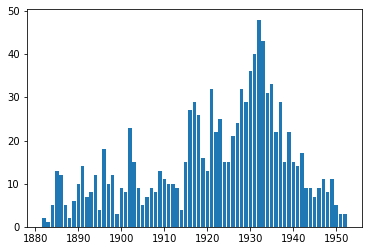

In [92]:
import matplotlib.pyplot as plt
plt.bar(works_per_year.keys(),works_per_year.values())

<BarContainer object of 71 artists>

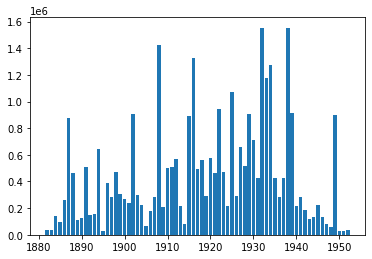

In [120]:
plt.bar(words_per_year.keys(),words_per_year.values())

#### 1.1.2 Distribution of words in works over time

## 2. Quality of the pubblication year annotation (to be update)

### 2.0 Check the correctness of the assignment of the texts on wikipedia

#### Naive inforet system

In [93]:
Title='Leibniz'
results=[(x['title: '],x['year: ']) for x in clean_corpus if Title in x['title: ']]

In [94]:
def inforet(title):
    results=[(x['title: '],x['year: ']) for x in clean_corpus if title in x['title: ']]
    return results

In [95]:
len(results)

1

In [96]:
results

[("The Early Works of John Dewey, 1882-1898. Volume 1 / Leibniz's new essays concerning the human understanding",
  1888)]

In [97]:
#### check list from wiki:

ground_truth=[("The New Psychology","1884"),
("Psychology","1887"),
("Leibniz's New Essays Concerning the Human Understanding", '1888'),
("The Reflex Arc Concept in Psychology" ,'1896'),
("My Pedagogic Creed" ,"1897"),
("The School and Society" ,"1899"),
("The Child and the Curriculum" ,"1902"),
("The Relation of Theory to Practice in Education" ,"1904"),
("The Postulate of Immediate Empiricism" ,"1905"),
("How We Think" ,"1910"),
("German Philosophy and Politics" ,"1915"),
("Democracy and Education: an introduction to the philosophy of education" ,"1916"),
("Reconstruction in Philosophy" ,"1919"),
("Experience and Nature" ,"1925"),
("The Public and its Problems" ,"1927"),
("The Quest for Certainty, Gifford Lectures" ,"1929"),
("Individualism Old and New" ,"1930"),
("Philosophy and Civilization" ,"1931"),
("Art as Experience" ,"1934"),
("A Common Faith" ,"1934"),
("Liberalism and Social Action" ,"1935"),
("Experience and Education" ,"1938"),
("Logic: The Theory of Inquiry" ,"1938"),
("Freedom and Culture" ,"1939"),
("Knowing and the Known" ,"1949")]

In [98]:
len(ground_truth)

25

In [99]:
inforet('The New Psychology')

[('The Early Works of John Dewey, 1882-1898. Volume 1 / Early essays / The New Psychology',
  1884)]

In [112]:
sample=0
correct=0
to_be_checked=[]
for title,year in ground_truth:
    result=inforet(title)
    if len(result)==1:
        sample+=1
        if year==result[0][1]:
            correct+=1
        else:
            print('Ground truth: ',title,year, '     corpus solution: ', result[0])
    else:
        to_be_checked.append((title,year))

Ground truth:  The New Psychology 1884      corpus solution:  ('The Early Works of John Dewey, 1882-1898. Volume 1 / Early essays / The New Psychology', 1884)
Ground truth:  The Reflex Arc Concept in Psychology 1896      corpus solution:  ('The Early Works of John Dewey, 1882-1898. Volume 5 / Early essays / The Reflex Arc Concept in Psychology', 1896)
Ground truth:  My Pedagogic Creed 1897      corpus solution:  ('The Early Works of John Dewey, 1882-1898. Volume 5 / Early essays / My Pedagogic Creed', 1897)
Ground truth:  The Child and the Curriculum 1902      corpus solution:  ('The Middle Works of John Dewey, 1899-1924. Volume 2 / The child and the curriculum / The Child and the Curriculum ', 1902)
Ground truth:  German Philosophy and Politics 1915      corpus solution:  ('The Middle Works of John Dewey, 1899-1924. Volume 8 / German philosophy and politics / German Philosophy and Politics ', 1915)
Ground truth:  Reconstruction in Philosophy 1919      corpus solution:  ('The Middle Wo

In [113]:
sample

14

In [114]:
correct

0

In [115]:
to_be_checked

[('Psychology', '1887'),
 ("Leibniz's New Essays Concerning the Human Understanding", '1888'),
 ('The School and Society', '1899'),
 ('The Relation of Theory to Practice in Education', '1904'),
 ('The Postulate of Immediate Empiricism', '1905'),
 ('How We Think', '1910'),
 ('Democracy and Education: an introduction to the philosophy of education',
  '1916'),
 ('The Public and its Problems', '1927'),
 ('The Quest for Certainty, Gifford Lectures', '1929'),
 ('Individualism Old and New', '1930'),
 ('Experience and Education', '1938')]

In [104]:
inforet('Psychology')[5]

('The Early Works of John Dewey, 1882-1898. Volume 2 / Psychology / Psychology ',
 1887)

In [105]:
inforet("Leibniz")[0]

("The Early Works of John Dewey, 1882-1898. Volume 1 / Leibniz's new essays concerning the human understanding",
 1888)

In [106]:
inforet('The School and Society')[0]

('The Middle Works of John Dewey, 1899-1924. Volume 1 / The school and society / The School and Society ',
 1899)

In [107]:
inforet('The Relation of Theory to Practice in Education')

[]

In [108]:
inforet('The Postulate of Immediate Empiricism')

[]

In [109]:
inforet('How We Think')[0]

('The Middle Works of John Dewey, 1899-1924. Volume 6 / How we think / How We Think ',
 1910)

In [110]:
inforet('Democracy and Education: an introduction to the philosophy of education')

[]

In [111]:
inforet('Reconstruction in Philosophy')[0]

('The Middle Works of John Dewey, 1899-1924. Volume 12 / Reconstruction in philosophy / Reconstruction in Philosophy ',
 1920)

In [ ]:
inforet('Experience and Nature')[0]

In [ ]:
inforet('The Public and its Problems')

In [ ]:
inforet('The Quest for Certainty, Gifford Lectures')

In [ ]:
inforet('Individualism Old and New')

In [ ]:
inforet('Experience and Education')[0]

#### Observation:
Every time the function inforet found more than one solution is quite obvious which one is the correct one and every time the year annotation was correct

In [ ]:
for title,year in ground_truth:
    result=inforet(title)
    if len(result)>1:
        sample+=1
        correct+=1

In [ ]:
sample

In [ ]:
correct

#### What about not founded texts?

In [ ]:
for title,year in ground_truth:
    result=inforet(title)
    if len(result)==0: # leibniz is done
        results=inforet2(title)
        print(results, (title,year))

In [ ]:
def inforet2(title):
    results=[(x['title: '],x['year: ']) for x in clean_corpus if title in x['text: ']]
    return results

#### RESULTS
Over 25 titles and years taken from wikipedia 6 were not found, over the other 19 there is just one error